In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [498]:
data = pd.read_csv('AUC.csv')
data

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [499]:
for col in data.columns:
    print(f'{col}: {data[str(col)].nunique()}')

name: 82767
author: 48374
narrator: 29717
time: 2284
releasedate: 5058
language: 36
stars: 665
price: 1011


In [500]:
data_info = pd.DataFrame(data.dtypes, columns=['Tipe'])
data_info['Unik'] = data.nunique()
data_info['null'] = data.isnull().sum()
data_info

,Tipe,Unik,null
name,object,82767,0
author,object,48374,0
narrator,object,29717,0
time,object,2284,0
releasedate,object,5058,0
language,object,36,0
stars,object,665,0
price,object,1011,0


In [501]:
data.duplicated().sum()

0

In [502]:
data['author'] = data['author'].str.replace('Writtenby:', '')
data['narrator'] = data['narrator'].str.replace('Narratedby:', '')

In [503]:
data['releasedate'] = pd.to_datetime(data['releasedate'], format='%d-%m-%y')

In [504]:
def comma_remover(val):
    if ',' in val :
        return val.replace(',', '')
    elif val == 'Free':
        return np.nan
    else :
        return val

data['price']= data['price'].apply(comma_remover)

In [505]:
data['price'] = data['price'].astype(float)

In [506]:
data['price'] = data['price'].fillna(data['price'].mean())

In [507]:
data['price'].unique()

array([468., 820., 410., ..., 810., 710., 544.])

In [508]:
def time_parser(val):
    if 'Less' in val:
        return 1
    elif ('hr' in val) and ('min' in val):
        l = val.split('and')
        hour = l[0].strip()
        hour = int(hour.split(' ')[0]) * 60
        minute = l[1].strip()
        minute = int(minute.split(' ')[0])
        total = hour+minute
        return total

    else:
        if 'hr' in val:
            return int(val.split(' ')[0]) * 60
        elif 'min' in val:
            return int(val.split(' ')[0])
        
data['time'] = data['time'].apply(time_parser)

In [509]:
def stars_parser(val):
    if val == 'Not rated yet':
        return 0
    else:
        star_rating = val.split(' out')[0]
        star_rating = float(star_rating)
        return star_rating

data['rating'] = data['stars'].apply(stars_parser)

In [510]:
data['rating'].unique()

array([5. , 4.5, 4. , 0. , 3.5, 3. , 1. , 2. , 2.5, 1.5])

In [511]:
def stars_parser_to_total_ratings(val):
    if val == 'Not rated yet':
        return 0
    else:
        val = val.replace(',', '')
        star_rating = val.split('stars')[-1]
        star_rating = star_rating.split(' ')[0]
        star_rating = int(star_rating)
        return star_rating

data['total_ratings'] = data['stars'].apply(stars_parser_to_total_ratings)

In [512]:
data.drop('stars', axis=1, inplace=True)

In [513]:
data['language']=data['language'].str.capitalize()
data['language'].unique()

array(['English', 'Hindi', 'Spanish', 'German', 'French', 'Catalan',
       'Swedish', 'Italian', 'Danish', 'Finnish', 'Dutch', 'Hebrew',
       'Russian', 'Polish', 'Galician', 'Afrikaans', 'Icelandic',
       'Romanian', 'Japanese', 'Tamil', 'Portuguese', 'Urdu', 'Hungarian',
       'Czech', 'Bulgarian', 'Mandarin_chinese', 'Basque', 'Korean',
       'Arabic', 'Greek', 'Turkish', 'Ukrainian', 'Slovene', 'Norwegian',
       'Telugu', 'Lithuanian'], dtype=object)

In [514]:
data

,name,author,narrator,time,releasedate,language,price,rating,total_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-08-04,English,468.0,5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-05-01,English,820.0,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020-11-06,English,410.0,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-10-05,English,615.0,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,820.0,4.5,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017-03-09,English,596.0,0.0,0
87485,The Alps,StephenO'Shea,RobertFass,607,2017-02-21,English,820.0,0.0,0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016-12-30,English,938.0,0.0,0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011-02-23,English,680.0,0.0,0


In [515]:
data = data.dropna()

In [516]:
Numerical_col=[]
Categorical_col=[]
for feature in data.columns:
    if data[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

print(Categorical_col)
print(Numerical_col)

['name', 'author', 'narrator', 'language']
['time', 'releasedate', 'price', 'rating', 'total_ratings']


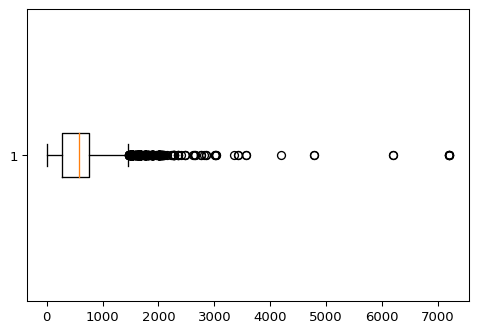

In [517]:
plt.figure(dpi=95, figsize=(6, 4))
plt.boxplot(data['price'], vert=False)
plt.show()

In [518]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['price'] < lower_bound) | (data['price'] > upper_bound)
data = data[~outliers]

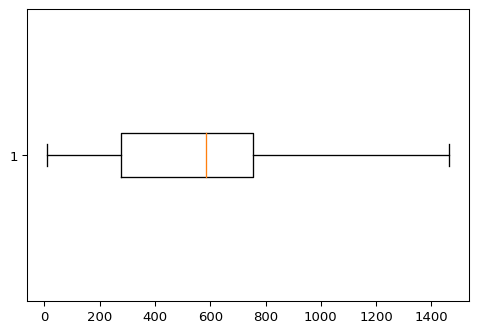

In [519]:
plt.figure(dpi=95, figsize=(6, 4))
plt.boxplot(data['price'], vert=False)
plt.show()

In [520]:
data = data.drop(['name'], axis=1)

In [521]:
data = data.drop(['total_ratings', 'narrator', 'author', 'releasedate'], axis=1)

In [522]:
data_info = pd.DataFrame(data.dtypes, columns=['Tipe'])
data_info['Unik'] = data.nunique()
data_info['null'] = data.isnull().sum()
data_info

,Tipe,Unik,null
time,int64,2170,0
language,object,36,0
price,float64,896,0
rating,float64,10,0


In [523]:
data = data.drop(['language'], axis=1)

In [524]:
data['price'].unique()

array([ 468.        ,  820.        ,  410.        ,  615.        ,
        656.        ,  233.        , 1256.        , 1206.        ,
       1093.        ,  467.        ,  836.        , 1003.        ,
        957.        ,  683.        ,  469.        ,  374.        ,
        702.        ,  501.        ,  284.        ,  575.        ,
        668.        ,  305.        , 1170.        ,  266.        ,
       1005.        ,  323.        ,  516.        ,  445.        ,
        585.        ,  703.        ,  117.        ,  192.        ,
         76.        ,  821.        ,  200.        ,  706.        ,
        904.        ,  679.        ,  112.        ,  531.        ,
        586.        , 1172.        ,  949.        ,  322.        ,
        569.        ,  398.        ,  352.        ,  164.        ,
        234.        ,  303.        ,   32.        ,  166.        ,
         38.        ,   75.        ,  799.        ,  664.        ,
        204.        ,  568.        ,  186.        ,  797.     

In [525]:
data['time'].unique()

array([ 140,  788,  123, ..., 1448, 1435, 2207], dtype=int64)

In [526]:
data.isnull().sum()

time      0
price     0
rating    0
dtype: int64

In [527]:
data = data.drop_duplicates()

In [528]:
data.duplicated().sum()

0

In [529]:
data

,time,price,rating
0,140,468.0,5.0
1,788,820.0,4.5
2,123,410.0,4.5
3,676,615.0,4.5
4,600,820.0,4.5
...,...,...,...
87484,454,596.0,0.0
87485,607,820.0,0.0
87486,1144,938.0,0.0
87487,248,680.0,0.0


In [530]:
data.to_csv('AUC_Clean123.csv', index=False)